Use Huggingface Transformer to generate image caption of a product photograph

In [1]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

# Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, you will need to authenticate your environment. To do this, run the new cell below. This step is not required if you are using Vertex AI Workbench.

In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

# Load the image from GCloud Storage

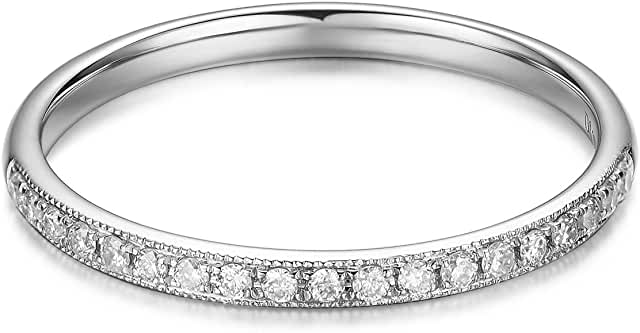

In [5]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

imageURL = 'https://storage.googleapis.com/fake-store-bucket/61sbMiUnoGL._AC_UL640_QL65_ML3_.jpg' #@param {type:"string"}
image = Image.open(requests.get(imageURL, stream=True).raw).convert('RGB')

image



# Generate image caption

- model name: Salesforce/blip-image-captioning-large
- Create a processor
- Load the pre-trained model
- Unconditional image processing

In [11]:
# Define project information
model_name = "Salesforce/blip-image-captioning-large"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

inputs = processor(image, return_tensors="pt")
out = model.generate(**inputs, max_new_tokens=128)

caption = processor.decode(out[0], skip_special_tokens=True)
print(caption)

a diamond wedding band with a row of diamonds on the side
